In [5]:
import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis
import matplotlib.pyplot as plt

In [6]:
handler = insightface.model_zoo.get_model('buffalo_l')
handler.prepare(ctx_id=0)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}


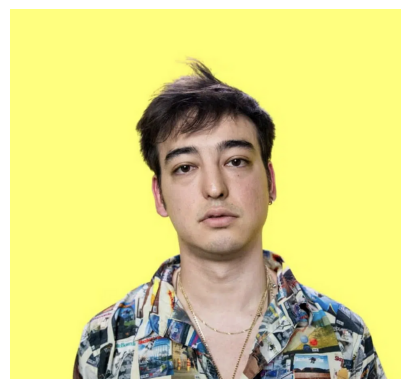

In [7]:
image_file = "./images/joji1.png"

img = cv2.imread(image_file)


temp = img[:,:,::-1]

plt.imshow(temp,cmap='gray')
plt.axis('off')
plt.show()



In [9]:
faces = handler.get(img)
print(faces)
rimg = handler.draw_on(img, faces)

TypeError: ArcFaceONNX.get() missing 1 required positional argument: 'face'